In [1]:
!pip install tensorflow

In [2]:
!pip install tensorflow[and-cuda]

In [5]:
import tensorflow as tf

a = tf.constant(2)
b = tf.constant(3)

c = tf.add(a, b)


result = c.numpy()
print(result)

5


In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import datetime  
import tensorflow  
from statsmodels.tsa.stattools import adfuller  
from sklearn.preprocessing import MinMaxScaler  
from tensorflow import keras  
from keras import callbacks  
from tensorflow.keras import Sequential  
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional  
from tensorflow.keras.optimizers import SGD  
import math  
from sklearn.metrics import mean_squared_error  
  
import warnings  
warnings.filterwarnings("ignore")  

In [3]:
dataset = pd.read_csv("traffic.csv")  
dataset.head()  

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
dataset["DateTime"]= pd.to_datetime(dataset["DateTime"])  
dataset = dataset.drop(["ID"], axis=1) #dropping IDs column  
dataset.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


Text(0.5, 0, 'Date')

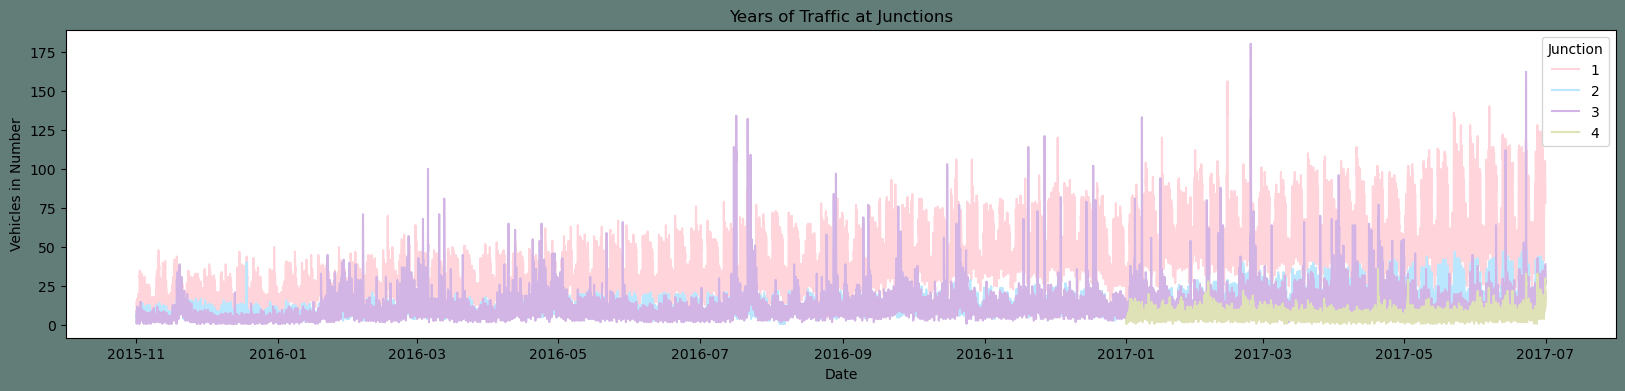

In [5]:
# dataframe to be used for EDA  
dataframe=dataset.copy()  
  
# Let's plot the Timeseries  
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]  
plt.figure(figsize=(20,4),facecolor="#627D78")  
Time_series=sns.lineplot(x=dataframe['DateTime'],y="Vehicles",data=dataframe, hue="Junction", palette=colors)  
Time_series.set_title("Years of Traffic at Junctions")  
Time_series.set_ylabel("Vehicles in Number")  
Time_series.set_xlabel("Date")  

In [6]:
# Exploring more features  
dataframe["Year"]= dataframe['DateTime'].dt.year  
dataframe["Month"]= dataframe['DateTime'].dt.month  
dataframe["Date_no"]= dataframe['DateTime'].dt.day  
dataframe["Hour"]= dataframe['DateTime'].dt.hour  
dataframe["Day"]= dataframe.DateTime.dt.strftime("%A")  
dataframe.head()  

,DateTime,Junction,Vehicles,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


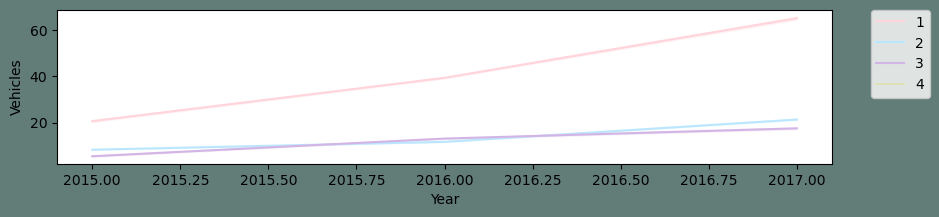

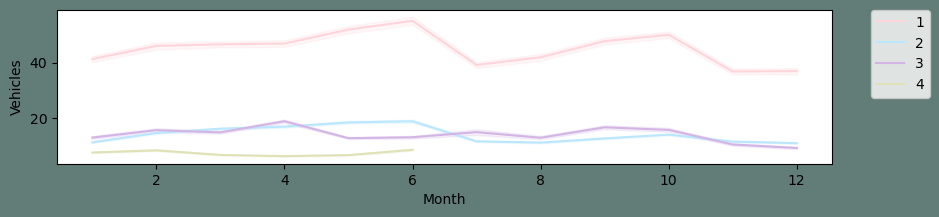

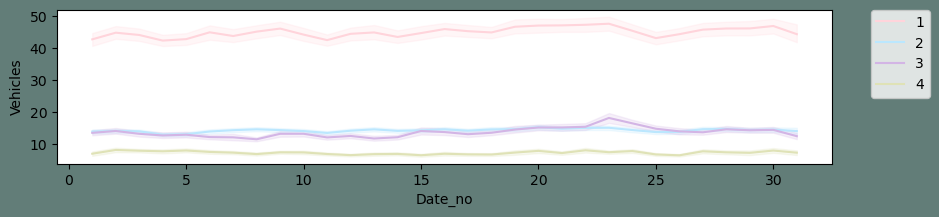

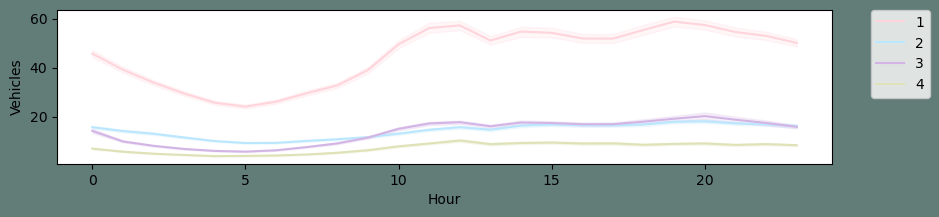

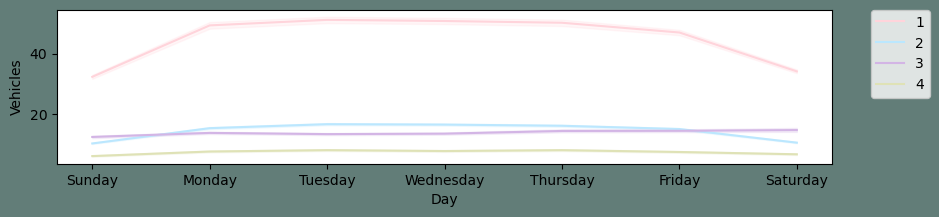

In [7]:
 #Let's plot the Timeseries  
new_features = [ "Year","Month", "Date_no", "Hour", "Day"]  
  
for i in new_features:  
    plt.figure(figsize=(10,2),facecolor="#627D78")  
    ax=sns.lineplot(x=dataframe[i],y="Vehicles",data=dataframe, hue="Junction", palette=colors )  
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  

Text(0.5, 0, 'Date')

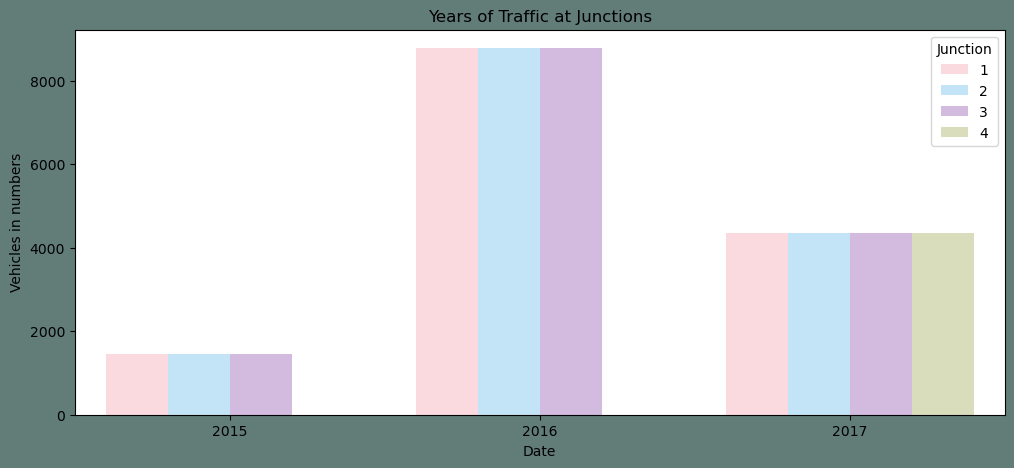

In [8]:
plt.figure(figsize=(12,5),facecolor="#627D78")  
count = sns.countplot(data=dataframe, x =dataframe["Year"], hue="Junction", palette=colors)  
count.set_title("Years of Traffic at Junctions")  
count.set_ylabel("Vehicles in numbers")  
count.set_xlabel("Date")  

<AxesSubplot:>

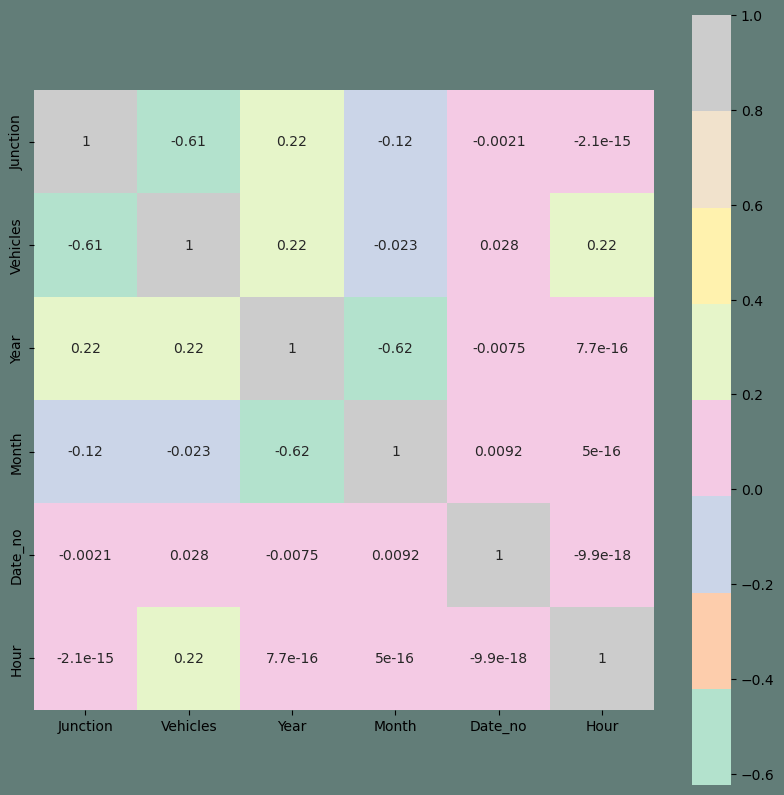

In [9]:
corrmat = dataframe.corr()  
plt.subplots(figsize=(10,10),facecolor="#627D78")  
sns.heatmap(corrmat,cmap= "Pastel2",annot=True,square=True, )  

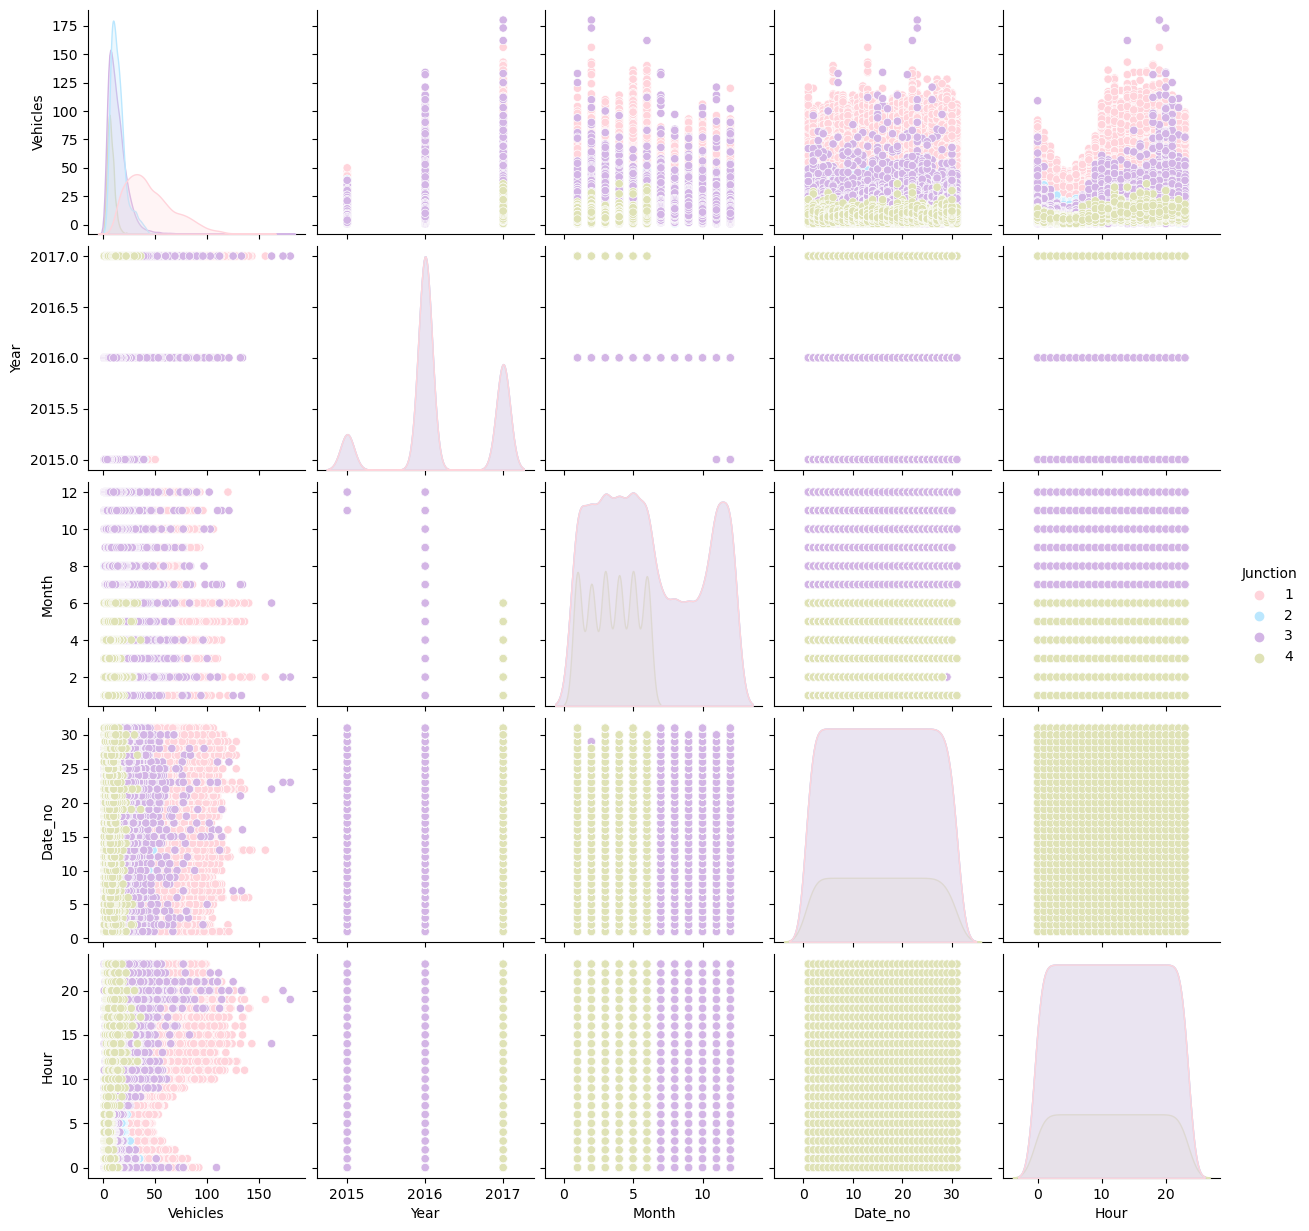

In [10]:
sns.pairplot(data=dataframe, hue= "Junction",palette=colors)  

In [11]:
# Pivoting dataset from junction  
dataframe_junction = dataset.pivot(columns="Junction", index="DateTime")  
dataframe_junction.describe()  

Vehicles                                         
Junction             1             2             3            4
count     14592.000000  14592.000000  14592.000000  4344.000000
mean         45.052906     14.253221     13.694010     7.251611
std          23.008345      7.401307     10.436005     3.521455
min           5.000000      1.000000      1.000000     1.000000
25%          27.000000      9.000000      7.000000     5.000000
50%          40.000000     13.000000     11.000000     7.000000
75%          59.000000     17.000000     18.000000     9.000000
max         156.000000     48.000000    180.000000    36.000000

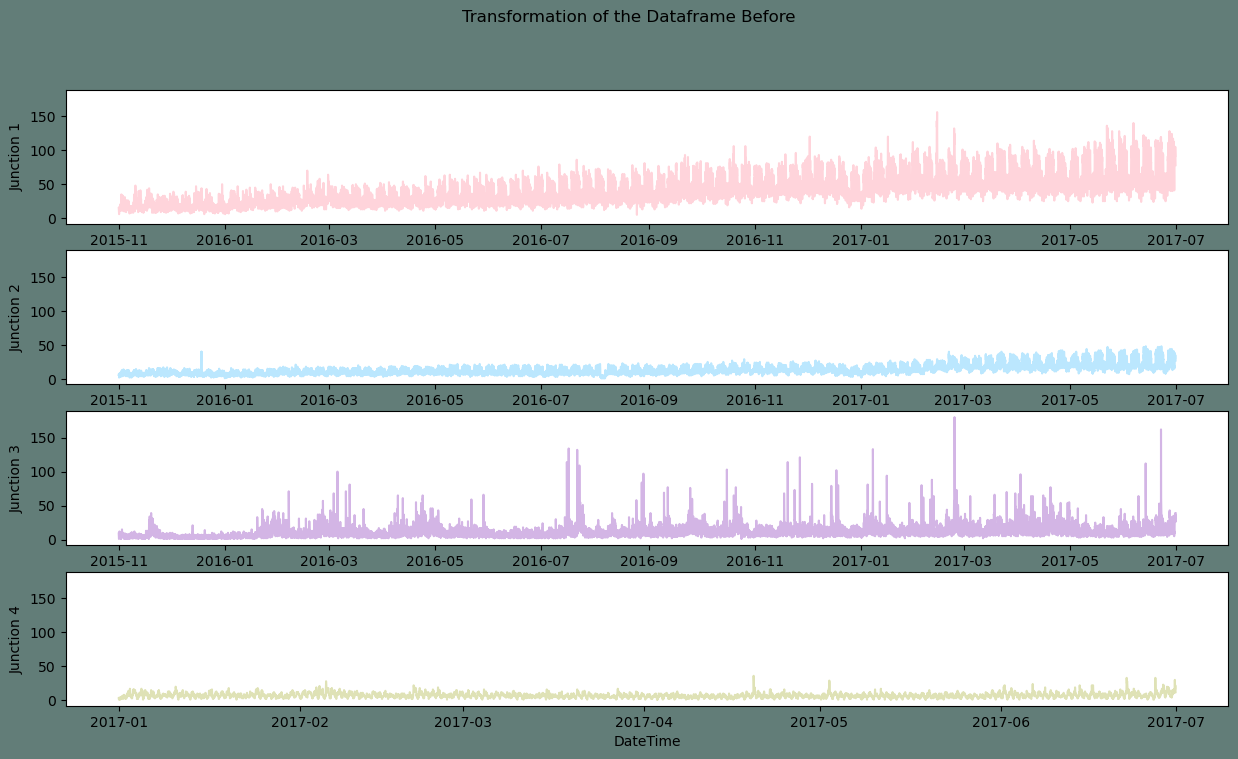

In [12]:
# Creating new dataframes  
dataframe_1 = dataframe_junction[[('Vehicles', 1)]]  
dataframe_2 = dataframe_junction[[('Vehicles', 2)]]  
dataframe_3 = dataframe_junction[[('Vehicles', 3)]]  
dataframe_4 = dataframe_junction[[('Vehicles', 4)]]  
dataframe_4 = dataframe_4.dropna() #For only a few months, Junction 4 has only had minimal data.  
  
# As DFS's data frame contains many indices, its index is lowering level one.  
list_dfs = [dataframe_1, dataframe_2, dataframe_3, dataframe_4]  
for i in list_dfs:  
    i.columns= i.columns.droplevel(level=1)    
  
# Creates comparison dataframe charts using this function  
def Sub_Plots4(dataframe_1, dataframe_2,dataframe_3,dataframe_4,title):  
    fig, axes = plt.subplots(4, 1, figsize=(15, 8),facecolor="#627D78", sharey=True)  
    fig.suptitle(title)  
    #J1  
    pl_1=sns.lineplot(ax=axes[0],data=dataframe_1,color=colors[0])  
    #pl_1=plt.ylabel()  
    axes[0].set(ylabel ="Junction 1")  
    #J2  
    pl_2=sns.lineplot(ax=axes[1],data=dataframe_2,color=colors[1])  
    axes[1].set(ylabel ="Junction 2")  
    #J3  
    pl_3=sns.lineplot(ax=axes[2],data=dataframe_3,color=colors[2])  
    axes[2].set(ylabel ="Junction 3")  
    #J4  
    pl_4=sns.lineplot(ax=axes[3],data=dataframe_4,color=colors[3])  
    axes[3].set(ylabel ="Junction 4")  
     
     
# It is displayed to test for stationarity.  
Sub_Plots4(dataframe_1.Vehicles, dataframe_2.Vehicles,dataframe_3.Vehicles,dataframe_4.Vehicles,"Transformation of the Dataframe Before") 

In [13]:
# Normalize Function  
def Normalize(dataframe,column):  
    average = dataframe[column].mean()  
    stdev = dataframe[column].std()  
    df_normalized = (dataframe[column] - average) / stdev  
    df_normalized = df_normalized.to_frame()  
    return df_normalized, average, stdev  
  
# Differencing Function  
def Difference(dataframe,column, interval):  
    diff = []  
    for i in range(interval, len(dataframe)):  
        value = dataframe[column][i] - dataframe[column][i - interval]  
        diff.append(value)  
    return diff  

In [14]:
# In order to make the series stationary, normalize and differ  
dataframe_N1, avg_J1, std_J1 = Normalize(dataframe_1, "Vehicles")  
Diff_1 = Difference(dataframe_N1, column="Vehicles", interval=(24*7)) #taking a week's difference  
dataframe_N1 = dataframe_N1[24*7:]  
dataframe_N1.columns = ["Norm"]  
dataframe_N1["Diff"]= Diff_1  
  
dataframe_N2, avg_J2, std_J2 = Normalize(dataframe_2, "Vehicles")  
Diff_2 = Difference(dataframe_N2, column="Vehicles", interval=(24)) #taking a day's difference  
dataframe_N2 = dataframe_N2[24:]  
dataframe_N2.columns = ["Norm"]  
dataframe_N2["Diff"]= Diff_2  
  
dataframe_N3, avg_J3, std_J3 = Normalize(dataframe_3, "Vehicles")  
Diff_3 = Difference(dataframe_N3, column="Vehicles", interval=1) #taking an hour's difference  
dataframe_N3 = dataframe_N3[1:]  
dataframe_N3.columns = ["Norm"]  
dataframe_N3["Diff"]= Diff_3  
  
dataframe_N4, avg_J4, std_J4 = Normalize(dataframe_4, "Vehicles")  
Diff_4 = Difference(dataframe_N4, column="Vehicles", interval=1) #taking an hour's difference  
dataframe_N4 = dataframe_N4[1:]  
dataframe_N4.columns = ["Norm"]  
dataframe_N4["Diff"]= Diff_4  

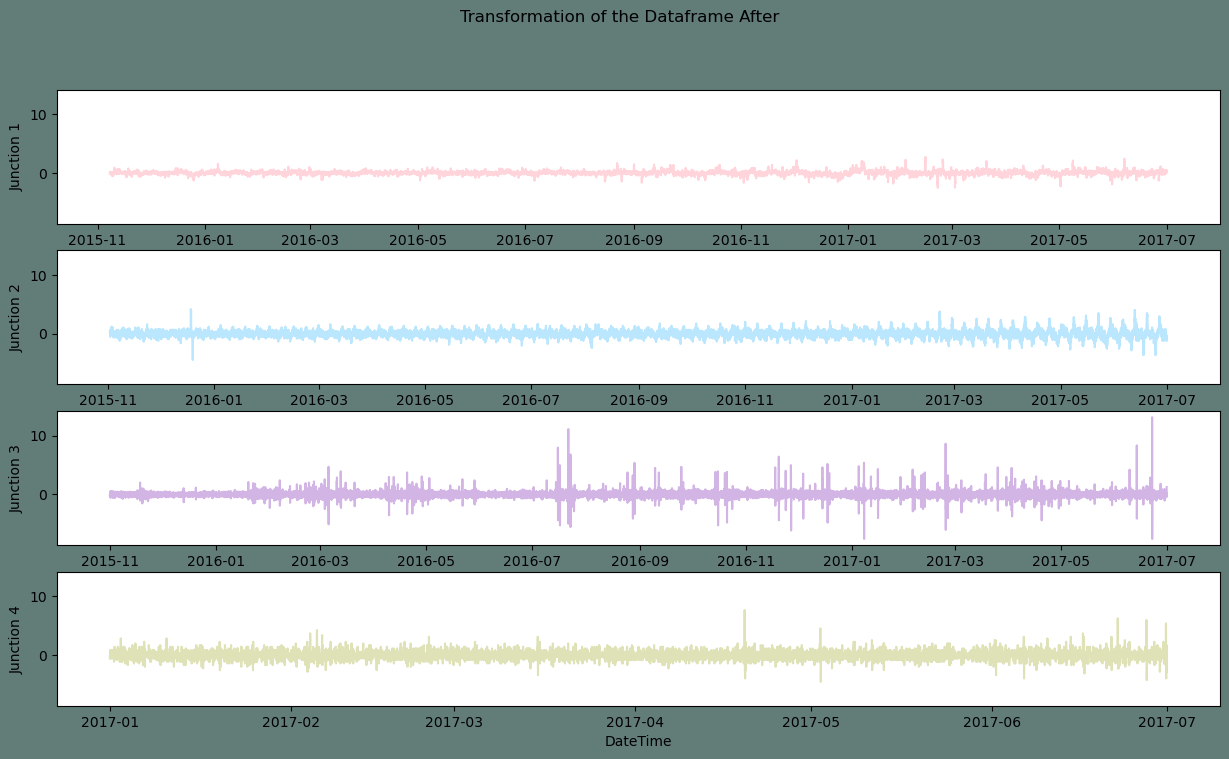

In [15]:
Sub_Plots4(dataframe_N1.Diff, dataframe_N2.Diff,dataframe_N3.Diff,dataframe_N4.Diff,"Transformation of the Dataframe After")

In [16]:
# Stationary time series check Improved Dickey-Fuller test  
def Stationary_check(dataframe):  
    check = adfuller(dataframe.dropna())  
    print(f"ADF Statistic: {check[0]}")  
    print(f"p-value: {check[1]}")  
    print("Critical Values:")  
    for key, value in check[4].items():  
        print('\t%s: %.3f' % (key, value))  
    if check[0] > check[4]["1%"]:  
        print("Time Series is Non-Stationary")  
    else:  
        print("Time Series is Stationary")  
   
  
# examining the series' stationary state  
  
List_df_ND = [ dataframe_N1["Diff"], dataframe_N2["Diff"], dataframe_N3["Diff"], dataframe_N4["Diff"]]  
print("Checking the transformed series for stationarity:")  
for i in List_df_ND:  
    print("\n")  
    Stationary_check(i)  

Checking the transformed series for stationarity:


ADF Statistic: -15.265303390415372
p-value: 4.798539876397681e-28
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -21.79589102694006
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -28.0017599088319
p-value: 0.0
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Time Series is Stationary


ADF Statistic: -17.97909256305252
p-value: 2.7787875325950227e-30
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Time Series is Stationary


In [17]:
# Several NA values were produced as a result of differencing using a week's worth of data.  
dataframe_J1 = dataframe_N1["Diff"].dropna()  
dataframe_J1 = dataframe_J1.to_frame()  
  
dataframe_J2 = dataframe_N2["Diff"].dropna()  
dataframe_J2 = dataframe_J2.to_frame()  
  
dataframe_J3 = dataframe_N3["Diff"].dropna()  
dataframe_J3 = dataframe_J3.to_frame()  
  
dataframe_J4 = dataframe_N4["Diff"].dropna()  
dataframe_J4 = dataframe_J4.to_frame()  
  
# Splitting the dataset  
def Split_data(dataframe):  
    training_size = int(len(dataframe)*0.90)  
    data_len = len(dataframe)  
    train, test = dataframe[0:training_size],dataframe[training_size:data_len]  
    train, test = train.values.reshape(-1, 1), test.values.reshape(-1, 1)  
    return train, test  
# Splitting the training and test datasets  
Junction1_train, Junction1_test = Split_data(dataframe_J1)  
Junction2_train, Junction2_test = Split_data(dataframe_J2)  
Junction3_train, Junction3_test = Split_data(dataframe_J3)  
Junction4_train, Junction4_test = Split_data(dataframe_J4)  
  
# Target and Feature  
def target_and_feature(dataframe):  
    end_len = len(dataframe)  
    X = []  
    y = []  
    steps = 32  
    for i in range(steps, end_len):  
        X.append(dataframe[i - steps:i, 0])  
        y.append(dataframe[i, 0])  
    X, y = np.array(X), np.array(y)  
    return X ,y  
  
# fixing the shape of X_test and X_train  
def FeatureFixShape(train, test):  
    train = np.reshape(train, (train.shape[0], train.shape[1], 1))  
    test = np.reshape(test, (test.shape[0],test.shape[1],1))  
    return train, test  
  
# Assigning features and target  
X_train_Junction1, y_train_Junction1 = target_and_feature(Junction1_train)  
X_test_Junction1, y_test_Junction1 = target_and_feature(Junction1_test)  
X_train_Junction1, X_test_Junction1 = FeatureFixShape(X_train_Junction1, X_test_Junction1)  
  
X_train_Junction2, y_train_Junction2 = target_and_feature(Junction2_train)  
X_test_Junction2, y_test_Junction2 = target_and_feature(Junction2_test)  
X_train_Junction2, X_test_Junction2 = FeatureFixShape(X_train_Junction2, X_test_Junction2)  
  
X_train_Junction3, y_train_Junction3 = target_and_feature(Junction3_train)  
X_test_Junction3, y_test_Junction3 = target_and_feature(Junction3_test)  
X_train_Junction3, X_test_Junction3 = FeatureFixShape(X_train_Junction3, X_test_Junction3)  
  
X_train_Junction4, y_train_Junction4 = target_and_feature(Junction4_train)  
x_test_Junction4, y_test_Junction4 = target_and_feature(Junction4_test)  
X_train_Junction4, x_test_Junction4 = FeatureFixShape(X_train_Junction4, x_test_Junction4)  

In [18]:
#Model for the prediction  
def GRU_model(X_Train, y_Train, X_Test):  
    early_stopping = callbacks.EarlyStopping(min_delta=0.001,patience=10, restore_best_weights=True)  
     
    #The GRU model  
    model = Sequential()  
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=150, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
     
    model.add(GRU(units=50, input_shape=(X_Train.shape[1],1), activation='tanh'))  
    model.add(Dropout(0.2))  
    model.add(Dense(units=1))  
     
    # Compiling the model  
    model.compile(optimizer=SGD(decay=1e-7, momentum=0.9),loss='mean_squared_error')  
    model.fit(X_Train,y_Train, epochs=50, batch_size=150,callbacks=[early_stopping])  
    pred_GRU= model.predict(X_Test)  
    return pred_GRU  
  
# To determine the root mean squared prediction error  
def RMSE_Value(test,predicted):  
    rmse = math.sqrt(mean_squared_error(test, predicted))  
    print("The root mean squared error is {}.".format(rmse))  
    return rmse  
  
# Plotting the goal and forecast comparison plot  
def PredictionsPlot(test,predicted,m):  
    plt.figure(figsize=(12,5),facecolor="#627D78")  
    plt.plot(test, color=colors[m],label="True Value",alpha=0.5 )  
    plt.plot(predicted, color="#627D78",label="Predicted Values")  
    plt.title("GRU Traffic Prediction Vs True values")  
    plt.xlabel("DateTime")  
    plt.ylabel("Number of Vehicles")  
    plt.legend()  
    plt.show()  

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import legacy

def GRU_model(X_train, y_train, X_test):
    # Define the model
    model = Sequential()
    model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    
    # Compile the model with the legacy optimizer
    model.compile(optimizer=legacy.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                  loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=2)
    
    # Make predictions
    predictions = model.predict(X_test)
    return predictions

# Example usage
# Assuming X_train_Junction1, y_train_Junction1, X_test_Junction1 are already defined
PredJ1 = GRU_model(X_train_Junction1, y_train_Junction1, X_test_Junction1)


Epoch 1/50
162/162 - 7s - loss: 0.0391 - val_loss: 0.0720 - 7s/epoch - 45ms/step
Epoch 2/50
162/162 - 4s - loss: 0.0370 - val_loss: 0.0708 - 4s/epoch - 24ms/step
Epoch 3/50
162/162 - 4s - loss: 0.0370 - val_loss: 0.0708 - 4s/epoch - 23ms/step
Epoch 4/50
162/162 - 4s - loss: 0.0369 - val_loss: 0.0703 - 4s/epoch - 26ms/step
Epoch 5/50
162/162 - 4s - loss: 0.0369 - val_loss: 0.0702 - 4s/epoch - 26ms/step
Epoch 6/50
162/162 - 4s - loss: 0.0369 - val_loss: 0.0701 - 4s/epoch - 24ms/step
Epoch 7/50
162/162 - 3s - loss: 0.0369 - val_loss: 0.0702 - 3s/epoch - 20ms/step
Epoch 8/50
162/162 - 4s - loss: 0.0369 - val_loss: 0.0699 - 4s/epoch - 27ms/step
Epoch 9/50
162/162 - 4s - loss: 0.0369 - val_loss: 0.0699 - 4s/epoch - 24ms/step
Epoch 10/50
162/162 - 4s - loss: 0.0369 - val_loss: 0.0700 - 4s/epoch - 25ms/step
Epoch 11/50
162/162 - 3s - loss: 0.0368 - val_loss: 0.0698 - 3s/epoch - 19ms/step
Epoch 12/50
162/162 - 4s - loss: 0.0368 - val_loss: 0.0699 - 4s/epoch - 26ms/step
Epoch 13/50
162/162 - 4s 

The root mean squared error is 0.23956912340793984.


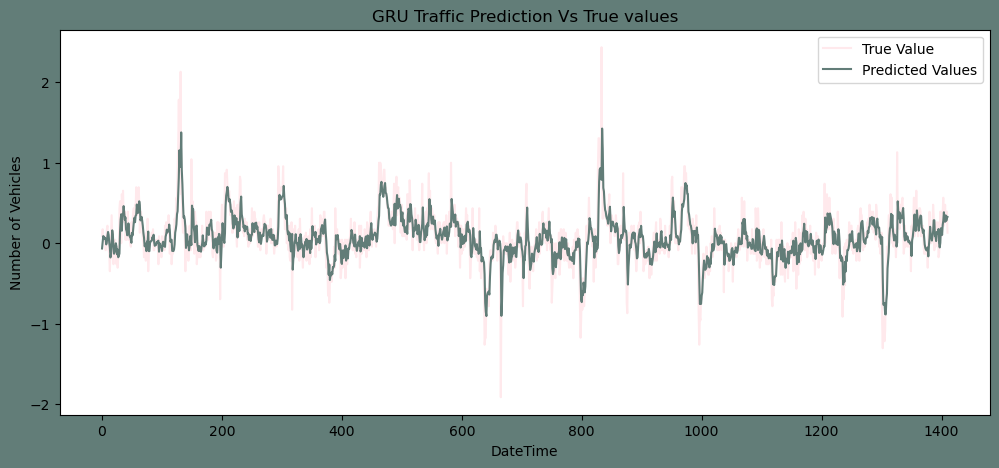

In [24]:
#Results for J1  
RMSE_J1=RMSE_Value(y_test_Junction1,PredJ1)  
PredictionsPlot(y_test_Junction1,PredJ1,0)  

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import legacy

def GRU_model(X_train, y_train, X_test):
    # Define the model
    model = Sequential()
    model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    
    # Compile the model with the legacy optimizer
    model.compile(optimizer=legacy.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                  loss='mean_squared_error')
    
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=2)
    
    # Make predictions
    predictions = model.predict(X_test)
    return predictions

#Predictions For Second Junction  
PredJ2 = GRU_model(X_train_Junction2,y_test_Junction1,X_test_Junction2)  

ValueError: Data cardinality is ambiguous:
  x sizes: 10463
  y sizes: 1411
Make sure all arrays contain the same number of samples.

In [ ]:
#Results for J2  
RMSE_J2=RMSE_Value(y_test_Junction2,PredJ2)  
PredictionsPlot(y_test_Junction2,PredJ2,1)  

In [ ]:
#Predictions For Third Junction  
PredJ3 = GRU_model(X_train_Junction3,y_train_Junction3,X_test_Junction3)  